In [60]:
import numpy as np
import pandas as pd

In [61]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [62]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [63]:
df_can.shape

(195, 43)

In [64]:
df_can.drop(['AREA','REG','DEV','Type', 'Coverage'], axis=1, inplace = True)

In [65]:
df_can.columns

Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013],
      dtype='object')

In [66]:
df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)

In [67]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [68]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

In [69]:
df_can.columns = list(map(str, df_can.columns))

In [70]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

True

In [71]:
df_can.set_index('Country', inplace=True)

In [72]:
df_can['Total'] = df_can.sum(axis=1)

In [73]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [74]:
df_can.shape

(195, 38)

In [75]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print('version of matplotlib: ', mpl.__version__)

version of matplotlib:  3.1.3


In [76]:
df_can.sort_values(['Total'], ascending=False, inplace=True)

In [77]:
df_top5=df_can.head(5)

In [79]:
years = list(map(str, range(1980, 2014)))

In [80]:
df_top5=df_top5[years].transpose()

In [81]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [82]:
df_top5.index = df_top5.index.map(int)

# area plot

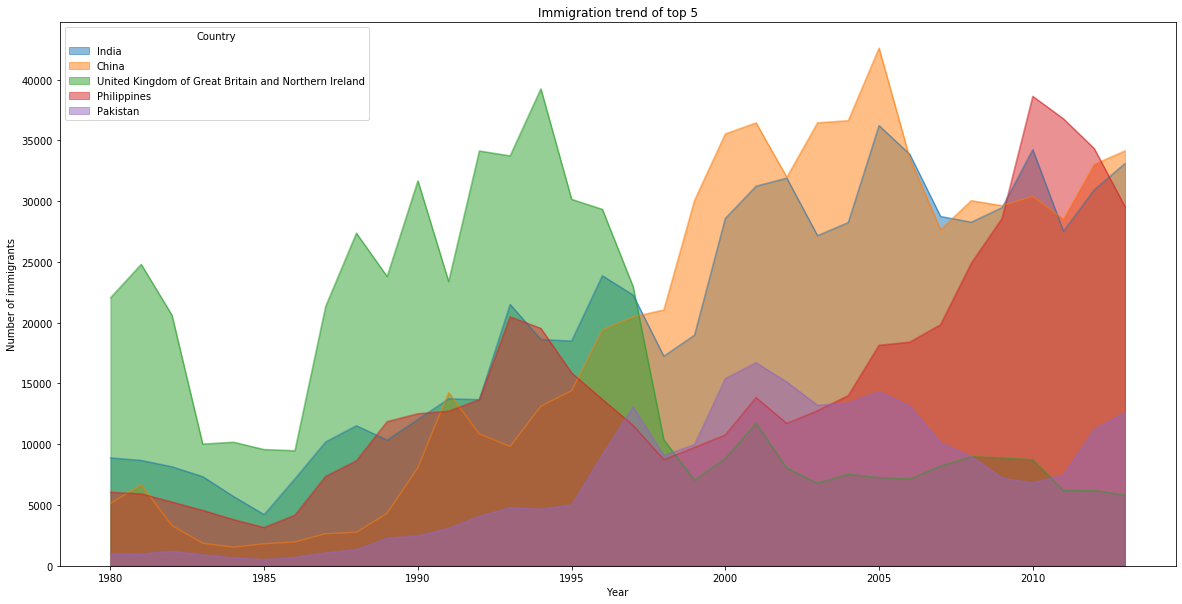

In [83]:
df_top5.plot(kind='area', stacked=False, figsize=(20,10))
plt.title ('Immigration trend of top 5')
plt.ylabel ('Number of immigrants')
plt.xlabel('Year')
plt.show()

# changing alpha, 

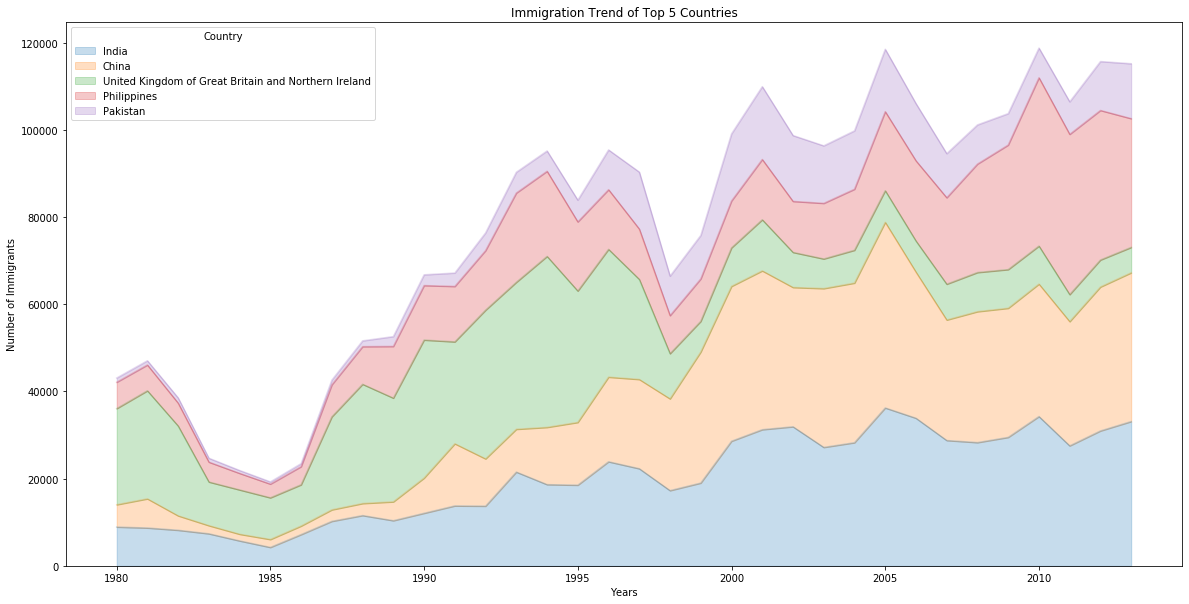

In [84]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=True,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

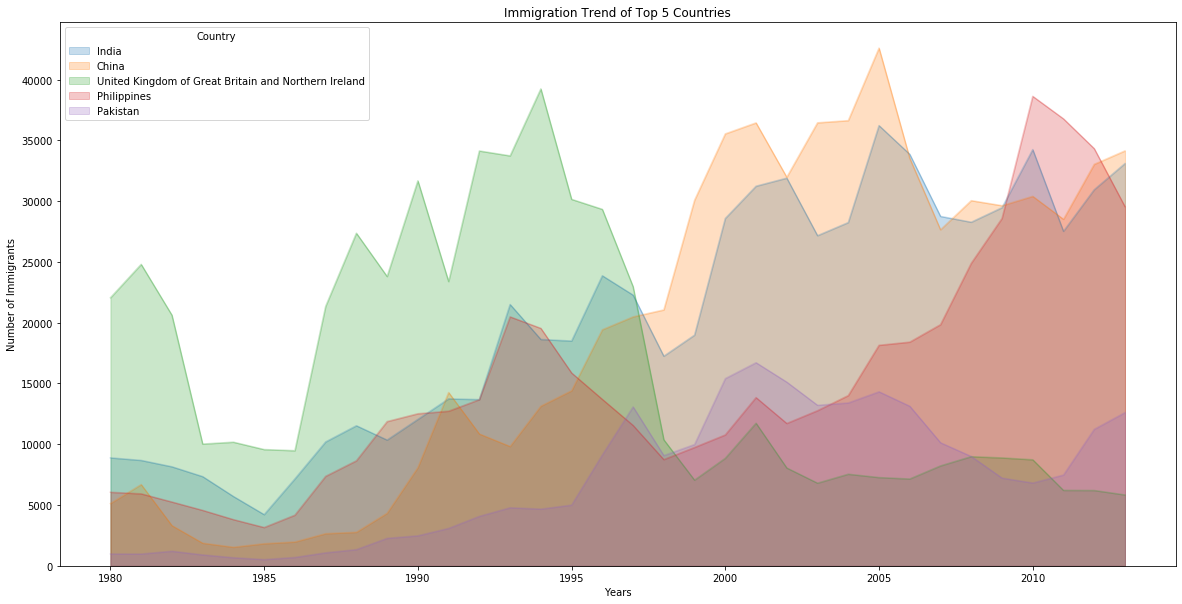

In [85]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# draw using the scripting layer

Text(0.5, 0, 'Year')

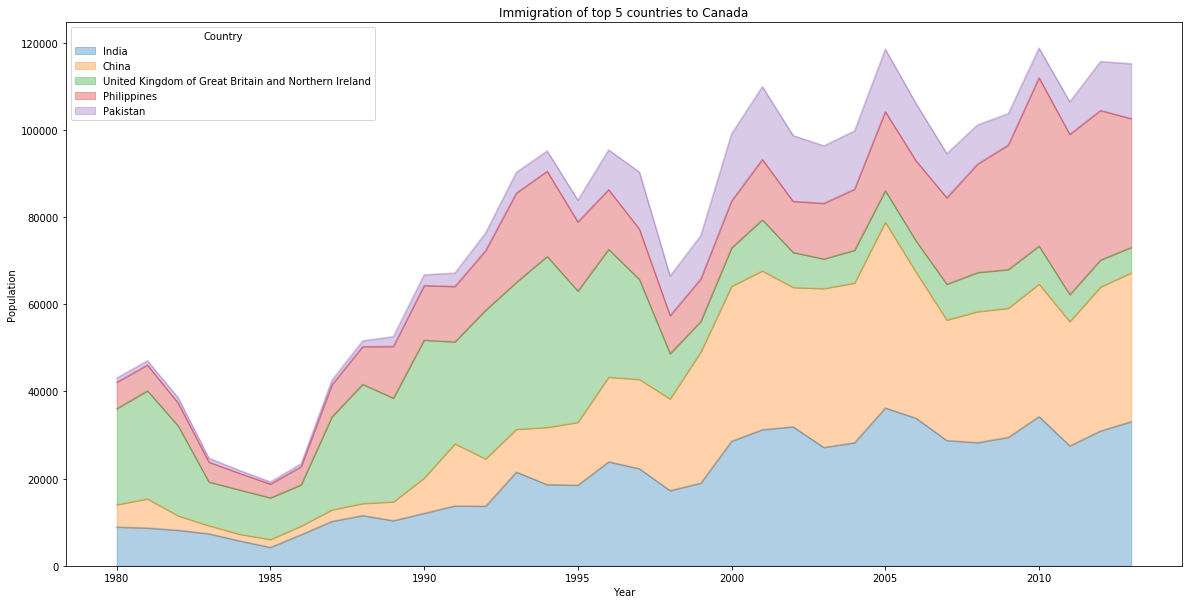

In [86]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize = (20, 10))
ax.set_title('Immigration of top 5 countries to Canada')
ax.set_ylabel('Population')
ax.set_xlabel('Year')

In [87]:
df_can.sort_values(['Total'], ascending=True, inplace=True)

In [88]:
df_bot5=df_can.head(5)

In [89]:
df_bot5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


In [90]:
df_bot5 = df_bot5[years].transpose()

In [99]:
df_bot5.index = df_bot5.index.map(int)

Text(0.5, 0, 'Years')

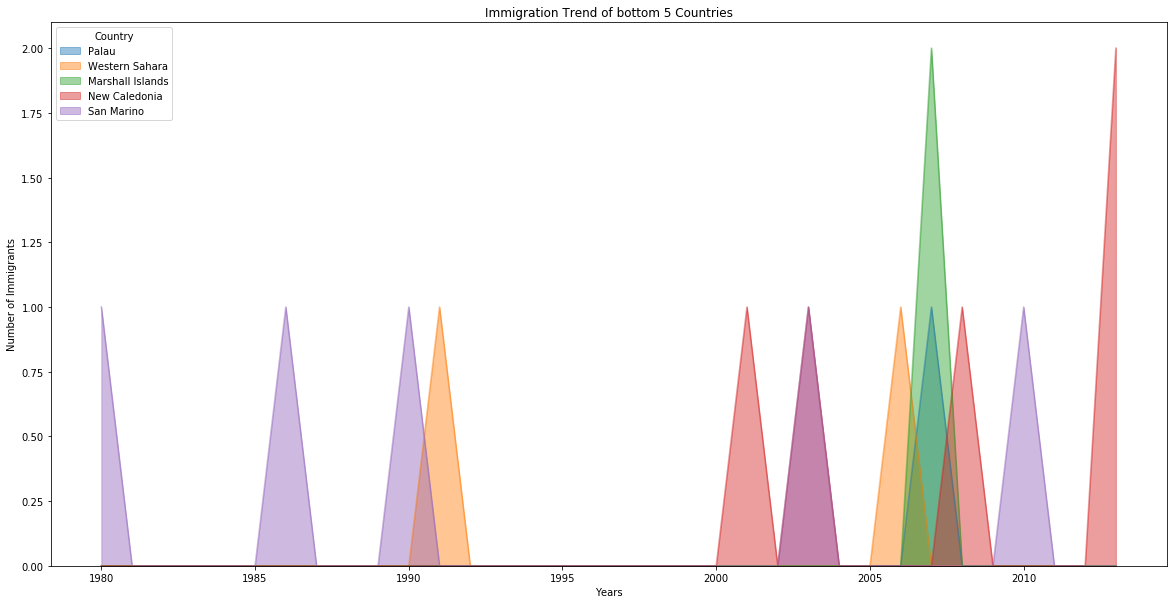

In [100]:
ax = df_bot5.plot(kind='area', alpha=0.45, stacked=False, figsize=(20,10))
ax.set_title('Immigration Trend of bottom 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [101]:
df_can['2013'].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [103]:
df_can.sort_values('Total', ascending = False, inplace=True)

In [114]:
df_can['2013']

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
                                                        ...  
San Marino                                                  0
New Caledonia                                               2
Marshall Islands                                            0
Western Sahara                                              0
Palau                                                       0
Name: 2013, Length: 195, dtype: int64

In [115]:
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


In [123]:
df_2013 = df_can['2013']

Text(0.5, 0, 'year')

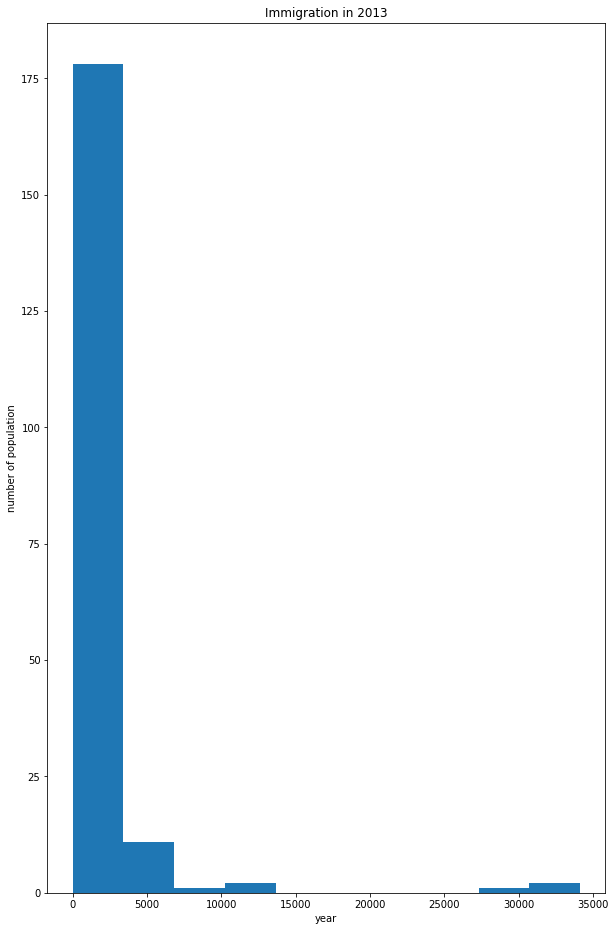

In [126]:
ax1 = df_2013.plot(kind='hist', figsize = (10,16))
ax1.set_title('Immigration in 2013')
ax1.set_ylabel('number of population')
ax1.set_xlabel('year')

In [118]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [120]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


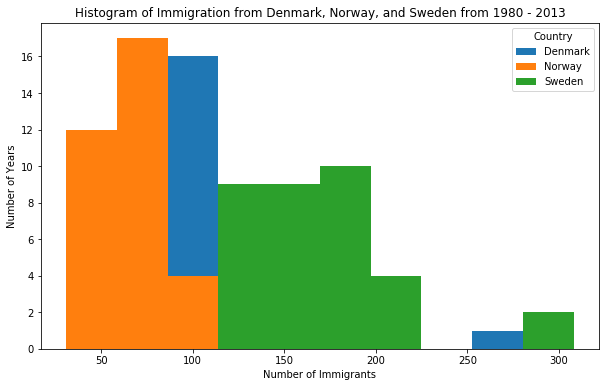

In [121]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [134]:
df3 = df_can.loc[['Denmark','Norway','Sweden'], years]

In [135]:
df3=df3[years].transpose()

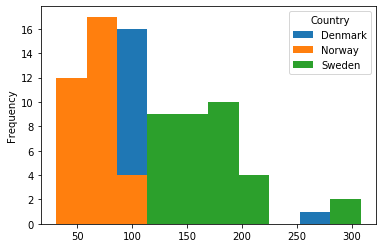

In [136]:
df3.plot.hist()

In [138]:
count, bin_edges = np.histogram(df3, 15)

In [139]:
print(count, bin_edges)

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3] [ 31.          49.46666667  67.93333333  86.4        104.86666667
 123.33333333 141.8        160.26666667 178.73333333 197.2
 215.66666667 234.13333333 252.6        271.06666667 289.53333333
 308.        ]


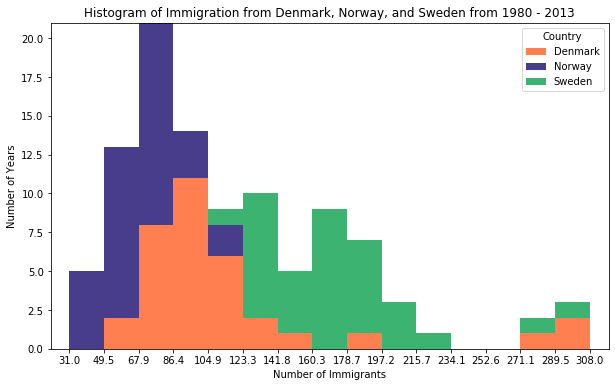

In [144]:
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10
df3.plot(kind='hist',
        figsize=(10,6),
        bins=15,
        xticks=bin_edges,
        color=['coral', 'darkslateblue', 'mediumseagreen'],
        stacked=True,
        xlim=(xmin,xmax)
        )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [151]:
df4=df_can.loc[['Greece','Albania','Bulgaria'],years]

In [152]:
df4=df4.transpose()

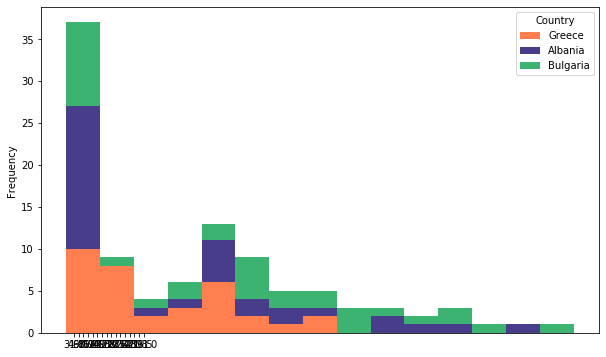

In [153]:
ax = df4.plot(kind='hist',
             figsize=(10,6),
              bins=15,
        xticks=bin_edges,
        color=['coral', 'darkslateblue', 'mediumseagreen'],
        stacked=True,
             )


# bar chart

In [154]:
df_iceland = df_can.loc['Iceland', years]

In [155]:
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

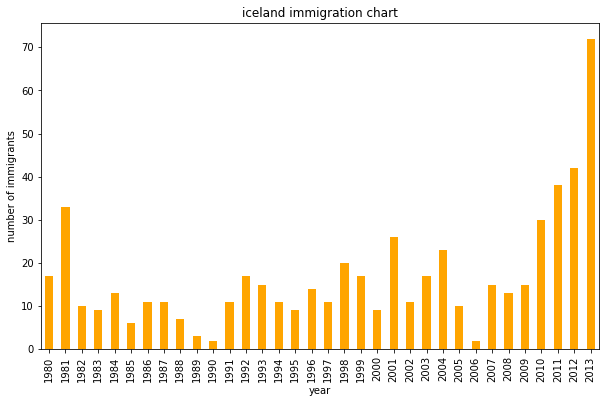

In [159]:
df_iceland.plot(kind='bar', figsize = (10,6), color='orange')
plt.title('iceland immigration chart')
plt.ylabel('number of immigrants')
plt.xlabel('year')
plt.show()

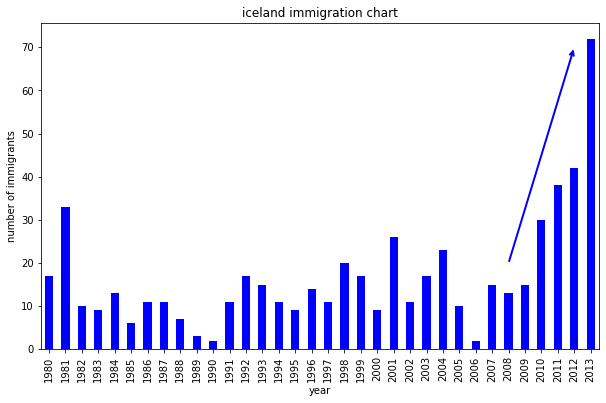

In [164]:
df_iceland.plot(kind='bar', figsize = (10,6), color='blue')
plt.title('iceland immigration chart')
plt.ylabel('number of immigrants')
plt.xlabel('year')
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.show()


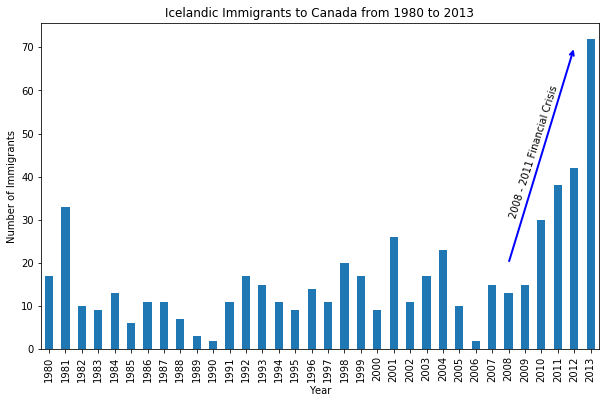

In [167]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

In [170]:

df_can.sort_values(by='Total', ascending=True, inplace=True)
# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15


Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

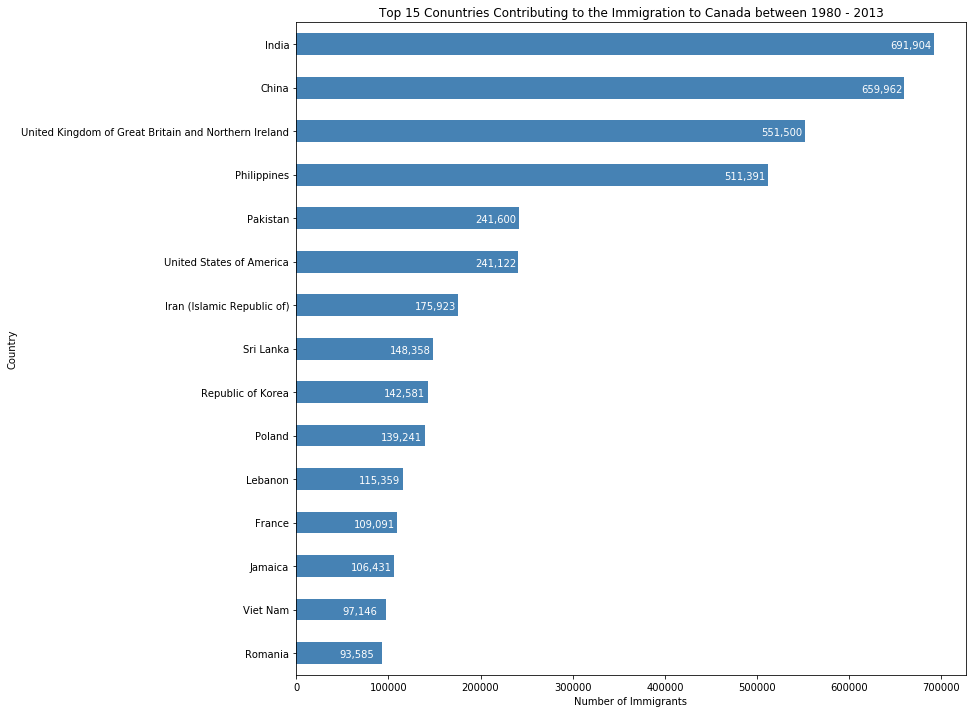

In [172]:

df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()
